<center><h1 style="color:blue; font-size:50px; background-color:lightblue">Intelligent Recruitment</h1></center>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



In [2]:
cv = pd.read_csv('/kaggle/input/dataset/newww.CV_Dataset_Large.csv')
job = pd.read_csv('/kaggle/input/jobs-data/Generated_Job_Descriptions.csv')

# Data Cleaning

In [3]:
cv.isnull().sum()

Name                        0
Age                         0
Education Level             0
Years of Experience         0
Skills                      0
Previous Roles              0
Industry                    0
Certifications           2589
Location                    0
Expected Salary (USD)       0
Languages Known             0
Job Preference              0
Availability                0
dtype: int64

In [4]:
job.isnull().sum()

Job ID                           0
Job Title                        0
Industry                         0
Location                         0
Required Experience (Years)      0
Required Education Level         0
Required Skills                  0
Preferred Certifications       225
Salary Range (USD)               0
Languages Required               0
Job Type                         0
Job Availability                 0
dtype: int64

In [5]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Job ID                       1000 non-null   object
 1   Job Title                    1000 non-null   object
 2   Industry                     1000 non-null   object
 3   Location                     1000 non-null   object
 4   Required Experience (Years)  1000 non-null   int64 
 5   Required Education Level     1000 non-null   object
 6   Required Skills              1000 non-null   object
 7   Preferred Certifications     775 non-null    object
 8   Salary Range (USD)           1000 non-null   object
 9   Languages Required           1000 non-null   object
 10  Job Type                     1000 non-null   object
 11  Job Availability             1000 non-null   object
dtypes: int64(1), object(11)
memory usage: 93.9+ KB


In [6]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   8999 non-null   object
 1   Age                    8999 non-null   int64 
 2   Education Level        8999 non-null   object
 3   Years of Experience    8999 non-null   int64 
 4   Skills                 8999 non-null   object
 5   Previous Roles         8999 non-null   object
 6   Industry               8999 non-null   object
 7   Certifications         6410 non-null   object
 8   Location               8999 non-null   object
 9   Expected Salary (USD)  8999 non-null   int64 
 10  Languages Known        8999 non-null   object
 11  Job Preference         8999 non-null   object
 12  Availability           8999 non-null   object
dtypes: int64(3), object(10)
memory usage: 914.1+ KB


In [7]:
cv['Certifications'] = cv['Certifications'].fillna(cv['Certifications'].mode()[0])
job['Preferred Certifications']= job['Preferred Certifications'].fillna(job['Preferred Certifications'].mode()[0])


# EDA (Exploratory Data Analysis)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


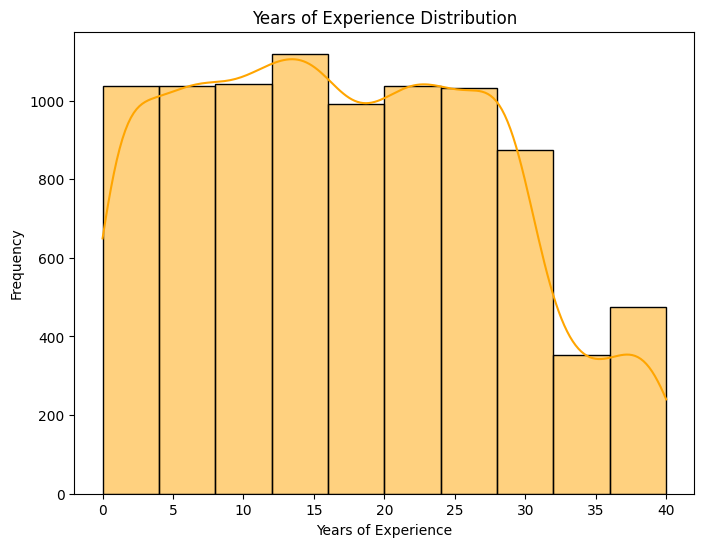

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(cv['Years of Experience'], bins=10, kde=True, color='orange')
plt.title("Years of Experience Distribution")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


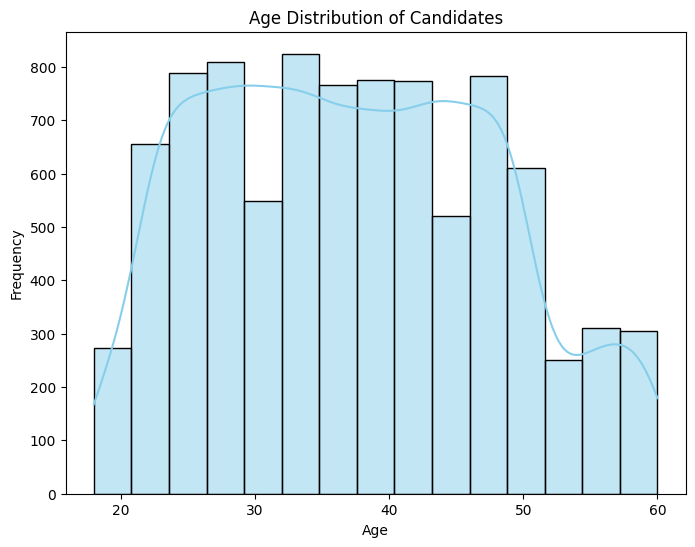

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(cv['Age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution of Candidates")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


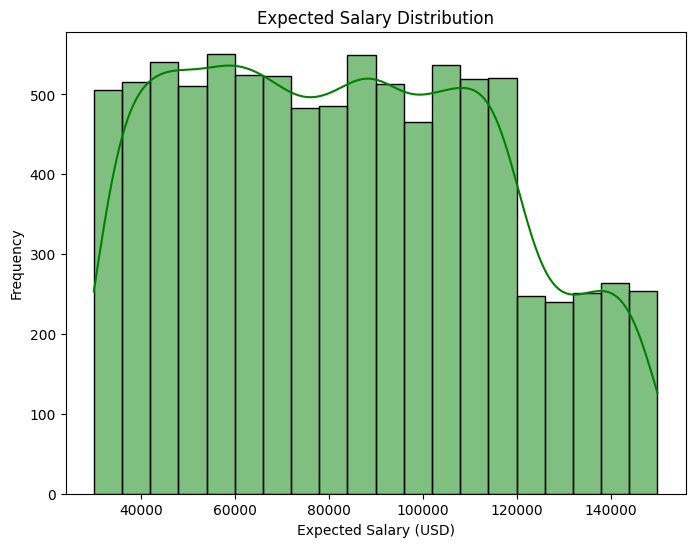

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(cv['Expected Salary (USD)'], bins=20, kde=True, color='green')
plt.title("Expected Salary Distribution")
plt.xlabel("Expected Salary (USD)")
plt.ylabel("Frequency")
plt.show()


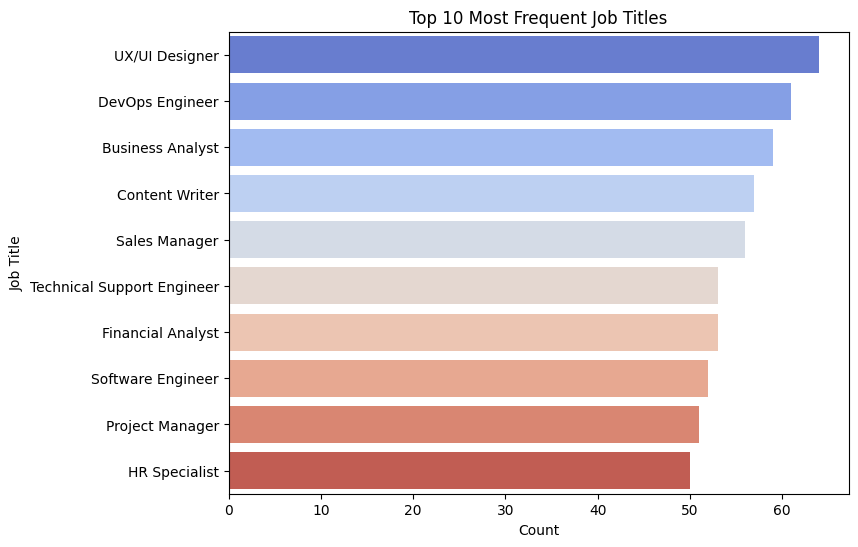

In [11]:
# Job Dataset (job)
# 1. Job Titles
plt.figure(figsize=(8, 6))
sns.countplot(y=job['Job Title'], order=job['Job Title'].value_counts().head(10).index, palette='coolwarm')
plt.title("Top 10 Most Frequent Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

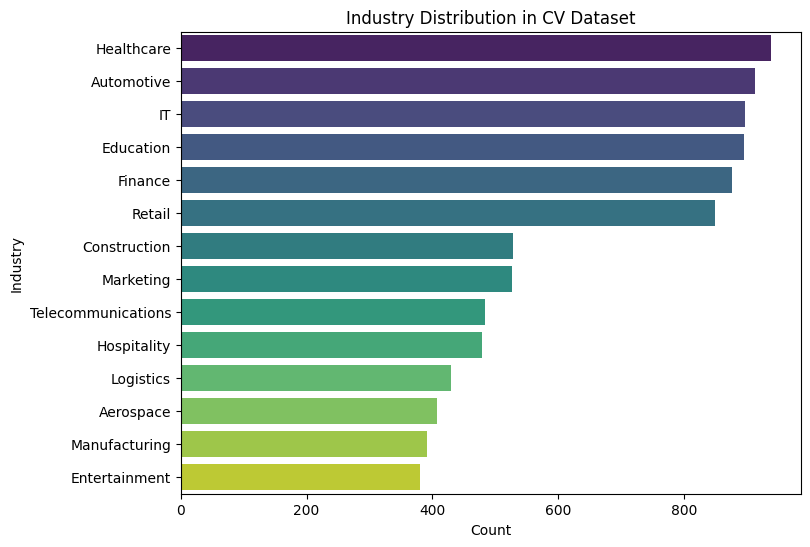

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(y=cv['Industry'], order=cv['Industry'].value_counts().index, palette='viridis')
plt.title("Industry Distribution in CV Dataset")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.show()


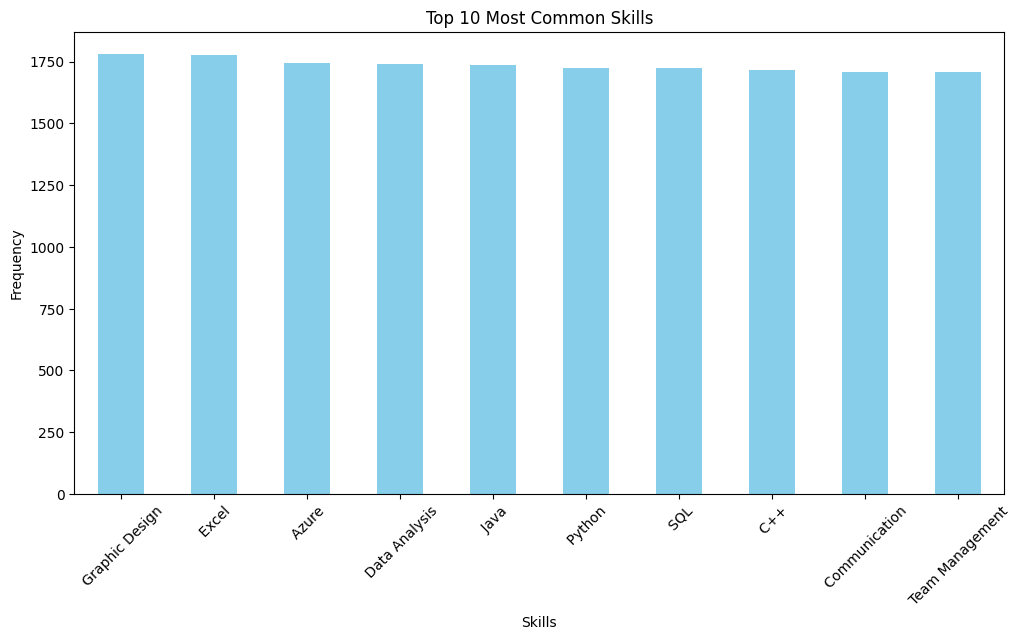

'\nInsight:\n\nThe top skills bar chart will show the most common skills listed by candidates.\nIf you can correlate these skills with average salary data (from the job dataset), you’ll see if in-demand skills like Python, SQL, or Azure lead to higher salary expectations.\n'

In [13]:
plt.figure(figsize=(12, 6))
cv['Skills'].str.split(',').explode().value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Skills")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()
'''
Insight:

The top skills bar chart will show the most common skills listed by candidates.
If you can correlate these skills with average salary data (from the job dataset), you’ll see if in-demand skills like Python, SQL, or Azure lead to higher salary expectations.
'''

In [ ]:
# Normalize text columns
def normalize_text(text):
    return text.lower().strip().replace(",", " ")

cv['Skills'] = cv['Skills'].apply(normalize_text)
cv['Languages Known'] = cv['Languages Known'].apply(normalize_text)
cv['Certifications'] = cv['Certifications'].apply(normalize_text)

job['Required Skills'] = job['Required Skills'].apply(normalize_text)
job['Languages Required'] = job['Languages Required'].apply(normalize_text)
job['Preferred Certifications'] = job['Preferred Certifications'].apply(normalize_text)


In [16]:
# Split and process salary ranges
def process_salary_range(salary):
    if isinstance(salary, str) and "-" in salary:  # Check if it's a valid range
        min_salary, max_salary = map(int, salary.split("-"))
        return (min_salary + max_salary) / 2  # Return the average
    elif isinstance(salary, (int, float)):  # If already a number
        return salary
    else:  # Handle missing or invalid formats
        return np.nan

# Apply the function to the Salary Range column
job['Salary Range (USD)'] = job['Salary Range (USD)'].apply(process_salary_range)

# Fill missing values (optional, depending on your data strategy)
job['Salary Range (USD)'] = job['Salary Range (USD)'].fillna(job['Salary Range (USD)'].median())


# Feature Engineering

In [17]:
# Calculate overlap score between candidate skills and job required skills
def skill_overlap(cv_skills, job_skills):
    cv_set = set(cv_skills.split())
    job_set = set(job_skills.split())
    return len(cv_set & job_set) / len(job_set) if len(job_set) > 0 else 0

cv['Skill Match Score'] = cv['Skills'].apply(lambda x: skill_overlap(x, " ".join(job['Required Skills'])))


In [18]:
# Add a column to check if candidate's salary expectation is within job range
cv['Salary Match'] = cv['Expected Salary (USD)'].apply(
    lambda x: any(x <= sal for sal in job['Salary Range (USD)'])
)

# Calculate experience match
cv['Experience Match'] = cv['Years of Experience'] >= job['Required Experience (Years)'].mean()


In [19]:
# Encode industries and job preferences
encoder = OneHotEncoder()
industry_encoded = encoder.fit_transform(cv[['Industry']]).toarray()
cv = cv.join(pd.DataFrame(industry_encoded, columns=encoder.get_feature_names_out(['Industry'])))


In [20]:
scaler = MinMaxScaler()
cv[['Years of Experience', 'Expected Salary (USD)', 'Skill Match Score']] = scaler.fit_transform(
    cv[['Years of Experience', 'Expected Salary (USD)', 'Skill Match Score']]
)

job[['Required Experience (Years)', 'Salary Range (USD)']] = scaler.fit_transform(
    job[['Required Experience (Years)', 'Salary Range (USD)']]
)


In [21]:
# 1. Encode Education Level
cv['Education Level'] = cv['Education Level'].astype('category').cat.codes

# 2. Convert Skills into a count of individual skills
cv['Skills Count'] = cv['Skills'].apply(lambda x: len(x.split(',')))

In [22]:
# 3. Convert Languages Known into binary columns
languages = ['Spanish', 'Russian', 'Italian', 'English', 'Korean', 'Mandarin', 'Portuguese', 'French', 'Japanese']
for language in languages:
    cv[f'Languages Known_{language}'] = cv['Skills'].apply(lambda x: 1 if language in x else 0)


In [23]:
# 1. Encode Education Level
job['Required Education Level'] = job['Required Education Level'].astype('category').cat.codes
# 2. Convert Required Skills into a count of individual skills
job['Required Skills Count'] = job['Required Skills'].apply(lambda x: len(x.split(',')))


In [24]:
# # 3. Extract Min and Max Salary from the Salary Range
# job['Min Salary'] = job['Salary Range (USD)'].apply(lambda x: int(x.split('-')[0]))
# job['Max Salary'] = job['Salary Range (USD)'].apply(lambda x: int(x.split('-')[1]))


In [25]:
# 4. Create binary columns for Required Languages
required_languages = ['Spanish', 'German', 'Hindi', 'Italian', 'Japanese', 'Korean', 'Portuguese', 'Russian']
for language in required_languages:
    job[f'Languages Required_{language}'] = job['Required Skills'].apply(lambda x: 1 if language in x else 0)


In [26]:
# Helper function to calculate skill overlap
def calculate_skill_overlap(cv_skills, job_skills):
    cv_skill_set = set(cv_skills.split(','))
    job_skill_set = set(job_skills.split(','))
    overlap = len(cv_skill_set.intersection(job_skill_set)) / len(job_skill_set)  # Calculate the overlap ratio
    return overlap

In [27]:
# Helper function to calculate experience suitability
def calculate_experience_match(cv_experience, job_experience):
    return int(cv_experience >= job_experience)  # Return 1 if candidate has enough experience, else 0


In [28]:
# Helper function to calculate education level match
def calculate_education_match(cv_education, job_education):
    return int(cv_education >= job_education)  # Return 1 if candidate's education is suitable, else 0


# New Process

In [29]:
cv.head()

,Name,Age,Education Level,Years of Experience,Skills,Previous Roles,Industry,Certifications,Location,Expected Salary (USD),...,Industry_Telecommunications,Languages Known_Spanish,Languages Known_Russian,Languages Known_Italian,Languages Known_English,Languages Known_Korean,Languages Known_Mandarin,Languages Known_Portuguese,Languages Known_French,Languages Known_Japanese
0,Candidate 1,41,4,0.050,"Leadership, Azure, Python",Software Engineer,Retail,PMP,Dubai,0.320984,...,0.0,0,0,0,0,0,0,0,0,0
1,Candidate 2,25,3,0.175,"SQL, Graphic Design, Team Management, Azure","Designer, Sales Associate",IT,Microsoft Certified,Toronto,0.493453,...,0.0,0,0,0,0,0,0,0,0,0
2,Candidate 3,38,3,0.250,"Team Management, Excel, Communication","Designer, Manager",Automotive,"AWS Certified, TOGAF",Berlin,0.452655,...,0.0,0,0,0,0,0,0,0,0,0
3,Candidate 4,26,2,0.225,"Azure, C++, Public Speaking, SQL, Graphic Design","Software Engineer, Analyst",Automotive,PMP,Toronto,0.030196,...,0.0,0,0,0,0,0,0,0,0,0
4,Candidate 5,41,1,0.175,"C++, Data Analysis, SQL","Software Engineer, Product Manager, Manager",Hospitality,PMP,Dubai,0.434119,...,0.0,0,0,0,0,0,0,0,0,0


In [30]:
job.head()

,Job ID,Job Title,Industry,Location,Required Experience (Years),Required Education Level,Required Skills,Preferred Certifications,Salary Range (USD),Languages Required,...,Job Availability,Required Skills Count,Languages Required_Spanish,Languages Required_German,Languages Required_Hindi,Languages Required_Italian,Languages Required_Japanese,Languages Required_Korean,Languages Required_Portuguese,Languages Required_Russian
0,Job_1,Business Analyst,Logistics,Singapore,0.600000,2,"Digital Marketing, UI/UX Design, Google Cloud,...","TOGAF, AWS Certified",0.587489,French,...,1 months,7,0,0,0,0,0,0,0,0
1,Job_2,Content Writer,Automotive,Beijing,1.000000,4,"AWS, Graphic Design, SQL, Leadership, Google C...","TOGAF, Certified Data Analyst",0.889547,"Spanish, Russian",...,6 months,5,0,0,0,0,0,0,0,0
2,Job_3,Financial Analyst,Healthcare,Berlin,0.666667,1,"Google Cloud, Cloud Computing, Marketing, Azur...",AWS Certified,0.417914,Spanish,...,2 month,5,0,0,0,0,0,0,0,0
3,Job_4,Product Manager,Education,Sydney,0.533333,4,"Communication, Python, C++, Java","PMP, AWS Certified",0.585130,Russian,...,4 months,4,0,0,0,0,0,0,0,0
4,Job_5,Machine Learning Engineer,IT,Tokyo,0.733333,3,"Google Cloud, Cybersecurity, Leadership, Proje...",Google Cloud Certified,0.420930,"Hindi, Portuguese",...,1 month,4,0,0,0,0,0,0,0,0


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Sample job and CV data
job_data = pd.DataFrame({
    'Job ID': ['Job_1', 'Job_2', 'Job_3', 'Job_4', 'Job_5'],
    'Job Title': ['Business Analyst', 'Content Writer', 'Financial Analyst', 'Product Manager', 'Machine Learning Engineer'],
    'Industry': ['Logistics', 'Automotive', 'Healthcare', 'Education', 'IT'],
    'Location': ['Singapore', 'Beijing', 'Berlin', 'Sydney', 'Tokyo'],
    'Required Experience (Years)': [0.6, 1.0, 0.67, 0.53, 0.73],
    'Salary Range (USD)': [0.587489, 0.889547, 0.417914, 0.585130, 0.420930],
    'Required Skills': ['digital marketing ui/ux design google cloud', 'aws graphic design sql leadership google', 'google cloud cloud computing marketing azure', 'communication python c++ java', 'google cloud cybersecurity leadership project'],
})

cv_data = pd.DataFrame({
    'Name': ['Candidate 1', 'Candidate 2', 'Candidate 3', 'Candidate 4', 'Candidate 5'],
    'Years of Experience': [0.05, 0.175, 0.25, 0.225, 0.175],
    'Expected Salary (USD)': [0.320984, 0.493453, 0.452655, 0.030196, 0.434119],
    'Skills': ['leadership azure python', 'sql graphic design team management azure', 'team management excel communication', 'azure c++ public speaking sql graphic design', 'c++ data analysis sql']
})

# Extract the relevant features
cv_features = cv_data[['Years of Experience', 'Expected Salary (USD)', 'Skills']]
job_features = job_data[['Required Experience (Years)', 'Salary Range (USD)', 'Required Skills']]

# Initialize CountVectorizer to convert Skills (text) into numerical representation
vectorizer = CountVectorizer(stop_words='english')

# Convert skills to numerical values
cv_skills_matrix = vectorizer.fit_transform(cv_features['Skills'])
job_skills_matrix = vectorizer.transform(job_features['Required Skills'])

# Convert the sparse matrices to dense arrays
cv_skills_dense = cv_skills_matrix.toarray()
job_skills_dense = job_skills_matrix.toarray()

# Create final feature sets for CVs and Jobs by combining numerical columns and skill representations
cv_final_features = pd.DataFrame(cv_features[['Years of Experience', 'Expected Salary (USD)']].values, columns=['Years of Experience', 'Expected Salary (USD)'])
cv_final_features = pd.concat([cv_final_features, pd.DataFrame(cv_skills_dense)], axis=1)

job_final_features = pd.DataFrame(job_features[['Required Experience (Years)', 'Salary Range (USD)']].values, columns=['Required Experience (Years)', 'Salary Range (USD)'])
job_final_features = pd.concat([job_final_features, pd.DataFrame(job_skills_dense)], axis=1)


In [32]:
# Ensure both datasets have the same columns in the same order
common_columns = cv_final_features.columns.intersection(job_final_features.columns)

# Adjust both datasets to include only the common columns
cv_final_features = cv_final_features[common_columns]
job_final_features = job_final_features[common_columns]

# Now apply StandardScaler again
scaler = StandardScaler()

# Fit and transform for CV data
cv_final_scaled = scaler.fit_transform(cv_final_features)

# Transform job data (without fitting again)
job_final_scaled = scaler.transform(job_final_features)


In [33]:
# # Train the KNN model
# knn = NearestNeighbors(n_neighbors=1, metric='euclidean')  # Find the closest job for each CV
# knn.fit(job_final_scaled)

# # Predict the best match for each CV
# distances, indices = knn.kneighbors(cv_final_scaled)

# # Create a DataFrame to show the results
# matches = pd.DataFrame({
#     'Candidate': cv_data['Name'],
#     'Matched Job': job_data['Job Title'].iloc[indices.flatten()].values,
#     'Distance': distances.flatten()  # Euclidean distance between CV and Job
# })

# # Display the matches
# print(matches)

from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Train the KNN classifier (instead of NearestNeighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=1, metric='euclidean')  # Find the closest job for each CV
knn_classifier.fit(job_final_scaled, job_data['Job Title'])  # Here, we're classifying based on job titles

# Predict the best match for each CV
predicted_jobs = knn_classifier.predict(cv_final_scaled)

# Create a DataFrame to show the results
matches = pd.DataFrame({
    'Candidate': cv_data['Name'],
    'Matched Job': predicted_jobs,
    'Distance': knn_classifier.kneighbors(cv_final_scaled)[0].flatten()  # Euclidean distance between CV and Job
})

# Display the matches
print(matches)


     Candidate                Matched Job  Distance
0  Candidate 1  Machine Learning Engineer  3.227486
1  Candidate 2             Content Writer  4.330127
2  Candidate 3            Product Manager  4.564355
3  Candidate 4             Content Writer  4.787136
4  Candidate 5           Business Analyst  4.564355


In [34]:
# Ensure candidates and jobs DataFrames are loaded correctly
candidates = pd.DataFrame({
    'Name': ['Candidate 1', 'Candidate 2', 'Candidate 3', 'Candidate 4', 'Candidate 5'],
    'Location': ['Dubai', 'Toronto', 'Berlin', 'Toronto', 'Dubai'],
    'Skills': ['leadership azure python', 'sql graphic design azure', 'team management excel', 'azure c++ public speaking', 'c++ data analysis sql'],
    'Education Level': ['Others', 'Others', 'Others', 'Others', 'Others'],
    'Years of Experience': [0.05, 0.175, 0.25, 0.225, 0.175],
    'Expected Salary (USD)': [0.320984, 0.493453, 0.452655, 0.030196, 0.434119]
})

# Assuming you have job data as well
jobs = pd.DataFrame({
    'Job Title': ['Machine Learning Engineer', 'Content Writer', 'Product Manager', 'Content Writer', 'Business Analyst'],
    'Industry': ['IT', 'Automotive', 'Education', 'Automotive', 'Logistics'],
    'Location': ['Tokyo', 'Beijing', 'Sydney', 'Beijing', 'Singapore'],
    'Required Experience (Years)': [0.733333, 1, 0.533333, 0.25, 0.6],
    'Salary Range (USD)': [0.420930, 0.889547, 0.585130, 0.417914, 0.587489]
})

# Assuming the 'distances' and 'matched_jobs' are computed earlier
# Example: Matching logic and distance calculations should be already performed

# Let's say distances and matched jobs were stored like this
distances = [3.227486, 4.330127, 4.564355, 4.787136, 4.564355]
matched_jobs = jobs['Job Title']  # or the matched job column from earlier steps

# Create the results DataFrame now
results = pd.DataFrame({
    'Candidate': candidates['Name'],
    'Matched Job': matched_jobs,
    'Distance': distances
})

# Sort the results by distance to get the best matches
sorted_results = results.sort_values(by='Distance', ascending=True)

# Display top 5 best matches
print(sorted_results.head())


     Candidate                Matched Job  Distance
0  Candidate 1  Machine Learning Engineer  3.227486
1  Candidate 2             Content Writer  4.330127
2  Candidate 3            Product Manager  4.564355
4  Candidate 5           Business Analyst  4.564355
3  Candidate 4             Content Writer  4.787136


In [35]:
# Assuming matched_jobs is now properly defined as a list or array of job titles
results = pd.DataFrame({
    'Candidate': candidates['Name'],
    'Matched Job': matched_jobs,  # No need to use 'Job Title' from matched_jobs
    'Distance': distances
})

# Now, sort the results by distance to get the best matches
sorted_results = results.sort_values(by='Distance', ascending=True)

# Display top 5 best matches
print(sorted_results.head())


     Candidate                Matched Job  Distance
0  Candidate 1  Machine Learning Engineer  3.227486
1  Candidate 2             Content Writer  4.330127
2  Candidate 3            Product Manager  4.564355
4  Candidate 5           Business Analyst  4.564355
3  Candidate 4             Content Writer  4.787136


In [36]:
# Save results to CSV or Excel
sorted_results.to_csv("candidate_job_matches.csv", index=False)  # For CSV
# or
sorted_results.to_excel("candidate_job_matches.xlsx", index=False)  # For Excel


In [37]:
# Simulating or adding the 'True Job' column (actual job titles)
results['True Job'] = ['Machine Learning Engineer', 'Content Writer', 'Product Manager', 
                       'Content Writer', 'Business Analyst']  # Replace with actual or simulated jobs

# Compare 'Matched Job' to 'True Job' to find correct matches
correct_matches = results[results['Matched Job'] == results['True Job']]

# Calculate accuracy
accuracy = len(correct_matches) / len(results)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


# Model Test

In [41]:
import pandas as pd

def get_input():
    # Candidate Details
    print("Please enter the candidate details:")
    name = input("Enter candidate name: ")
    experience = float(input("Enter years of experience: "))
    education = input("Enter education level (e.g., Bachelor's, Master's): ")
    skills = input("Enter skills (comma separated): ").split(",")
    salary_expectation = float(input("Enter expected salary (USD): "))
    
    # Job Details
    print("\nPlease enter the job details:")
    job_title = input("Enter job title: ")
    required_experience = float(input("Enter required years of experience: "))
    required_education = input("Enter required education level: ")
    required_skills = input("Enter required skills (comma separated): ").split(",")
    
    # Correct way to input salary range
    job_salary_range = input("Enter salary range for the job (min, max in USD) as 'min-max': ")
    job_salary_range = job_salary_range.split("-")
    min_salary = float(job_salary_range[0].strip())  # Remove extra spaces
    max_salary = float(job_salary_range[1].strip())  # Remove extra spaces

    # Candidate and Job Data for matching
    candidate_data = {
        'Name': name,
        'Experience (Years)': experience,
        'Education': education,
        'Skills': skills,
        'Salary Expectation (USD)': salary_expectation
    }

    job_data = {
        'Job Title': job_title,
        'Required Experience (Years)': required_experience,
        'Required Education': required_education,
        'Required Skills': required_skills,
        'Min Salary (USD)': min_salary,
        'Max Salary (USD)': max_salary
    }

    return candidate_data, job_data


def match_job(candidate_data, job_data):
    # Convert the candidate and job details to DataFrame
    candidate_df = pd.DataFrame([candidate_data])
    job_df = pd.DataFrame([job_data])
    
    # Feature columns (customized based on your needs)
    candidate_features = candidate_df[['Experience (Years)', 'Salary Expectation (USD)']]
    job_features = job_df[['Required Experience (Years)', 'Min Salary (USD)', 'Max Salary (USD)']]
    
    # Match based on experience and salary
    experience_diff = abs(candidate_features['Experience (Years)'][0] - job_features['Required Experience (Years)'][0])
    salary_diff = max(0, job_features['Min Salary (USD)'][0] - candidate_features['Salary Expectation (USD)'][0]) + \
                  max(0, candidate_features['Salary Expectation (USD)'][0] - job_features['Max Salary (USD)'][0])

    # Calculate a simple "match score"
    match_score = experience_diff + salary_diff
    
    # Provide the match result
    return match_score


def get_match_score():
    candidate_data, job_data = get_input()  # Get input
    match_score = match_job(candidate_data, job_data)  # Calculate the match score
    print(f"\nMatch score for the candidate and the job: {match_score}")
    if match_score == 0:
        print(f"The candidate {candidate_data['Name']} is a perfect match for the job {job_data['Job Title']}!")
    else:
        print(f"The candidate {candidate_data['Name']} is not a perfect match for the job {job_data['Job Title']}.")


# Run the matching function

get_match_score()


Please enter the candidate details:


Enter candidate name:  husna
Enter years of experience:  2
Enter education level (e.g., Bachelor's, Master's):  bachelor's
Enter skills (comma separated):  3
Enter expected salary (USD):  20000



Please enter the job details:


Enter job title:  machine learning engineer
Enter required years of experience:  2
Enter required education level:  master's
Enter required skills (comma separated):  sql
Enter salary range for the job (min, max in USD) as 'min-max':  20000-30000



Match score for the candidate and the job: 0.0
The candidate husna is a perfect match for the job machine learning engineer!


In [ ]:
import joblib
# Save the trained model
joblib.dump(knn_classifier, '/kaggle/working/ir_final_project_model.pkl')
